In [ ]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import collections
import string
import nltk
import re
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, TweetTokenizer, RegexpTokenizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, StackingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, mean_absolute_error, accuracy_score, roc_curve, auc, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
import joblib
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# Get tokenization of tweet text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Data/data_originar.xlsx")

In [ ]:
#test_size: 0,2 lo estamos diciendo que agarre el 80, 20 random_state: es la semilla que nos sirve para tener la misma division de datos de entrenamiento y prueba
train_data, test_data, train_labels, test_labels = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

In [ ]:
train_df = pd.DataFrame({'text': train_data, 'label': train_labels})
train_df.head(50)

,text,label
8118,q y como creer en todos aquellos defensor...,-1
4823,y nada de sacarlo y ponerlo de asesor,0
7999,si así como escriben respetaran,0
5602,rmp dina boluarte ha construido alianza clas...,-1
6901,todo está podrido la ministra de contrata a ...,-1
3479,denunciar el ejecutivo y congreso de la repú...,0
7611,tienen la con de contratar a dos payasos ...,-1
4857,mejor di que omite las muertes por cocid,0
6915,ya es el momento carajo,0
6769,fujimorista apoyas a un asesino corrupto sad,-1


In [ ]:
#remplazo cada textos segun su polaridad: neutral: 0, Negativo: -1, Positovo: 1
def create_column_target(data):
    mapping = {0: "Neutral", -1: "Negativo", 1: "Positivo"}
    data['target'] = data['label'].map(mapping)
    return data
train_df = create_column_target(train_df)
train_df = pd.DataFrame(train_df)

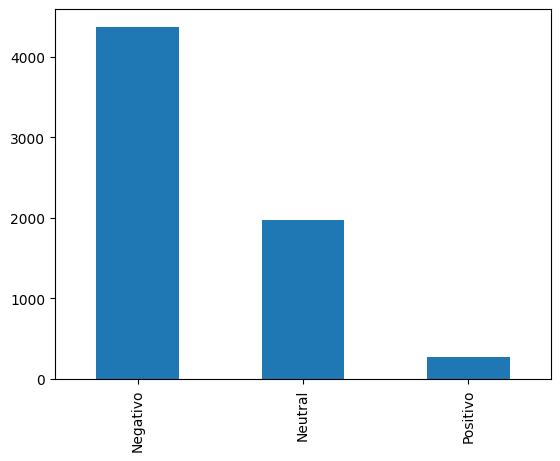

In [ ]:
train_df['target'].value_counts().plot.bar();

In [ ]:
#Cuenta cunas veces se repite cada palabra
class TextCounts(BaseEstimator, TransformerMixin):
    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))
    def fit(self, X, y=None, **fit_params):
        # fit method is used when specific operations need to be done on the train data, but not on the test data
        return self
    def transform(self, X, **transform_params):
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x))
        df = pd.DataFrame({'count_words': count_words})
        return df
tc = TextCounts()

In [ ]:
#Creo la columna count_words en el dataset traint_df
train_df['count_words'] = tc.fit_transform(train_df.text)

In [ ]:
#Muestro todas las filas
#pd.set_option('display.max_rows', 7000)
#Desactivo mostrar todas las filas
#pd.reset_option('display.max_rows')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

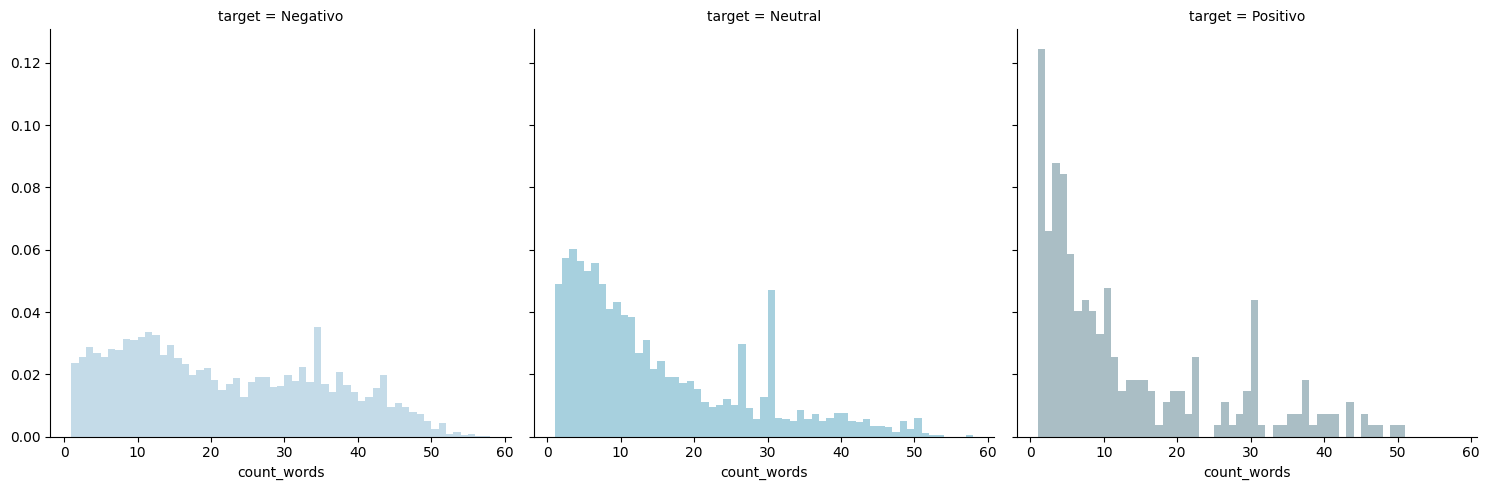

In [ ]:
def show_dist(df, col):
    #print('Descriptive stats for {}'.format(col))
    #print('-'*(len(col)+22))
    #print(df.groupby('polarity')[col].describe())
    bins = np.arange(df[col].min(), df[col].max() + 1)
    g = sns.FacetGrid(df, col='target', height=5, hue='target', palette="PuBuGn_d")
    g = g.map(sns.distplot, col, kde=False, norm_hist=True, bins=bins)
    plt.show()
show_dist(train_df, 'count_words')

In [ ]:
stopwordlist = ['un', 'una','que' ,'unos', 'unas', 'el','y','que', 'la','de', 'los', 'las', 'lo', 'al', 'del', 'a', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde', 'durante',
                'en', 'entre', 'hacia', 'hasta', 'mediante', 'para', 'por', 'según', 'sin', 'so', 'sobre', 'tras', 'si', 'no', 'ni', 'pero', 'sino', 'más', 'menos',
                'solo', 'sólo', 'también', 'tampoco', 'aunque', 'así', 'debe', 'debería', 'puede', 'podría', 'quizás', 'tal', 'vez', 'como', 'cuando', 'donde',
                'porque', 'siempre', 'nunca', 'jamás', 'igual', 'mismo', 'otro', 'otros', 'otra', 'otras', 'muy', 'mucho', 'poco', 'pocos', 'poca',
                'pocas', 'todo', 'todos', 'toda', 'todas', 'ningún', 'ninguna', 'ningunos', 'ningunas', 'cual', 'cuales', 'qué', 'quien', 'quienes', 'cómo', 'cuánto',
                'cuánta', 'cuántos', 'cuántas', 'qué', 'cuál', 'cuáles', 'éste', 'ésta', 'éstos', 'éstas', 'eso', 'aquello', 'aquí', 'ahí', 'allí', 'cerca', 'lejos',
                'fuera', 'dentro', 'encima', 'debajo', 'abajo', 'arriba', 'medio', 'fuera', 'primero', 'segundo', 'tercero', 'cuarto', 'quinto', 'sexto', 'séptimo',
                'octavo', 'noveno', 'décimo', 'anteayer', 'ayer', 'hoy', 'mañana', 'tarde', 'noche', 'vez', 'veces', 'siempre', 'nunca', 'jamás', 'todavía', 'ya',
                'aun', 'aún', 'quizá', 'tal', 'vez', 'cualquier', 'ninguno', 'todo', 'nadie', 'alguien', 'varios', 'varias', 'mucho', 'poco', 'pocos', 'muchos',
                'muchas', 'bastante', 'demasiado', 'menos', 'más', 'aún', 'incluso', 'solamente', 'únicamente', 'no', 'tampoco', 'sino', 'sí', 'claro', 'por', 'favor',
                'vale', 'hola', 'adiós', 'chao', 'gracias', 'hasta', 'luego', 'si', 'no', 'tal', 'vez', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k',
                'l', 'm','a', 'actualmente', 'acuerdo', 'adelante', 'además', 'afirmó', 'agregó', 'ahora', 'al', 'algo', 'algún', 'algunas', 'algunos', 'allí', 'alrededor',
                'ambos', 'ante', 'anterior', 'antes', 'apenas', 'aproximadamente', 'aquel', 'aquellas', 'aquellos', 'aqui', 'así', 'aseguró', 'aun', 'aunque', 'ayer',
                'bajo', 'buen', 'buenas', 'buenos', 'cada', 'casi', 'cerca', 'cierta', 'ciertas', 'cierto', 'ciertos', 'como', 'cómo', 'con',
                'conocer', 'considera', 'consideró', 'consigo', 'consigue', 'consiguen', 'contigo', 'contra', 'cosas', 'creo', 'cual', 'cuales', 'cualquier', 'cuando',
                'cuanta', 'cuantas', 'cuanto', 'cuantos', 'cuenta', 'da', 'dado', 'dan', 'dar', 'de', 'debe', 'deben', 'debido', 'decir', 'dejó', 'del', 'delante',
                'demás', 'demasiado', 'dentro', 'deprisa', 'desde', 'después', 'detras', 'dia', 'días', 'dice', 'dicen', 'dicho', 'dieron', 'diferente', 'diferentes',
                'dijeron', 'dijo', 'dio', 'donde', 'dos', 'durante', 'e', 'ejemplo', 'el', 'él', 'ella', 'ellas', 'ello', 'ellos', 'embargo', 'en', 'encuentra',
                'entonces', 'entre', 'era', 'eran', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'está', 'estaba', 'estado', 'estados', 'están', 'estar', 'estas',
                'este', 'esto', 'estos', 'estoy', 'etc', 'ésta', 'éstas', 'este', 'éstos', 'ex', 'excepto', 'existe', 'existen', 'explicó', 'expresó', 'fin', 'fue',
                'fuera', 'fueron', 'gran', 'grandes', 'ha', 'había', 'habían', 'haber', 'habrá', 'hace', 'hacen', 'hacer', 'hacia', 'haciendo', 'hago', 'han', 'hasta',
                'hay', 'haya', 'he', 'hecho', 'hemos', 'hicieron', 'hizo', 'hora', 'horas', 'hoy', 'hubo', 'igual', 'incluso', 'indicó', 'informó', 'junto', 'la',
                'lado', 'las', 'le', 'les', 'llegó', 'lleva', 'llevar', 'lo', 'los', 'luego','q','se','su','tu','o','xq','nos','x','jajaja','te',
                'jajajaja','jajajajajaja', 'nada','jajajajaja','jajajajajajaja','esta','va','pasa', 'biólogo', 'si', 'bien', 'ahora', 'vez', 'dónde', 'ud',
                'sigue', 'debe ser', 'toda', 'van', 'habla', 'mano', 'sra', 'dba', 'asi', 'sabe', 'estan', 'vas', 'ver', 'uds', 'ok', 'mas', 'amigo', 'vamos',
                'ser', 'pm av', 'pues', 'ncr', 'sea', 'son' 'rmp', 'sera','será','parece','nota','tan', 'clos', 'cara', 'der', 'mi', 'estás', 'sacan', 'rojo', 'ven', 'tus', 'cidh', 'ti', '\n']

In [ ]:

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
  return " ".join([word for word in str(text).split() if word.lower() not in STOPWORDS])
train_df['text'] = train_df['text'].apply(lambda text: cleaning_stopwords(text))

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
train_df['text'] = train_df['text'].apply(tokenizer.tokenize)

In [ ]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
train_df['text']= train_df['text'].apply(lambda x: stemming_on_text(x))

In [ ]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
train_df['text'] = train_df['text'].apply(lambda x: lemmatizer_on_text(x))

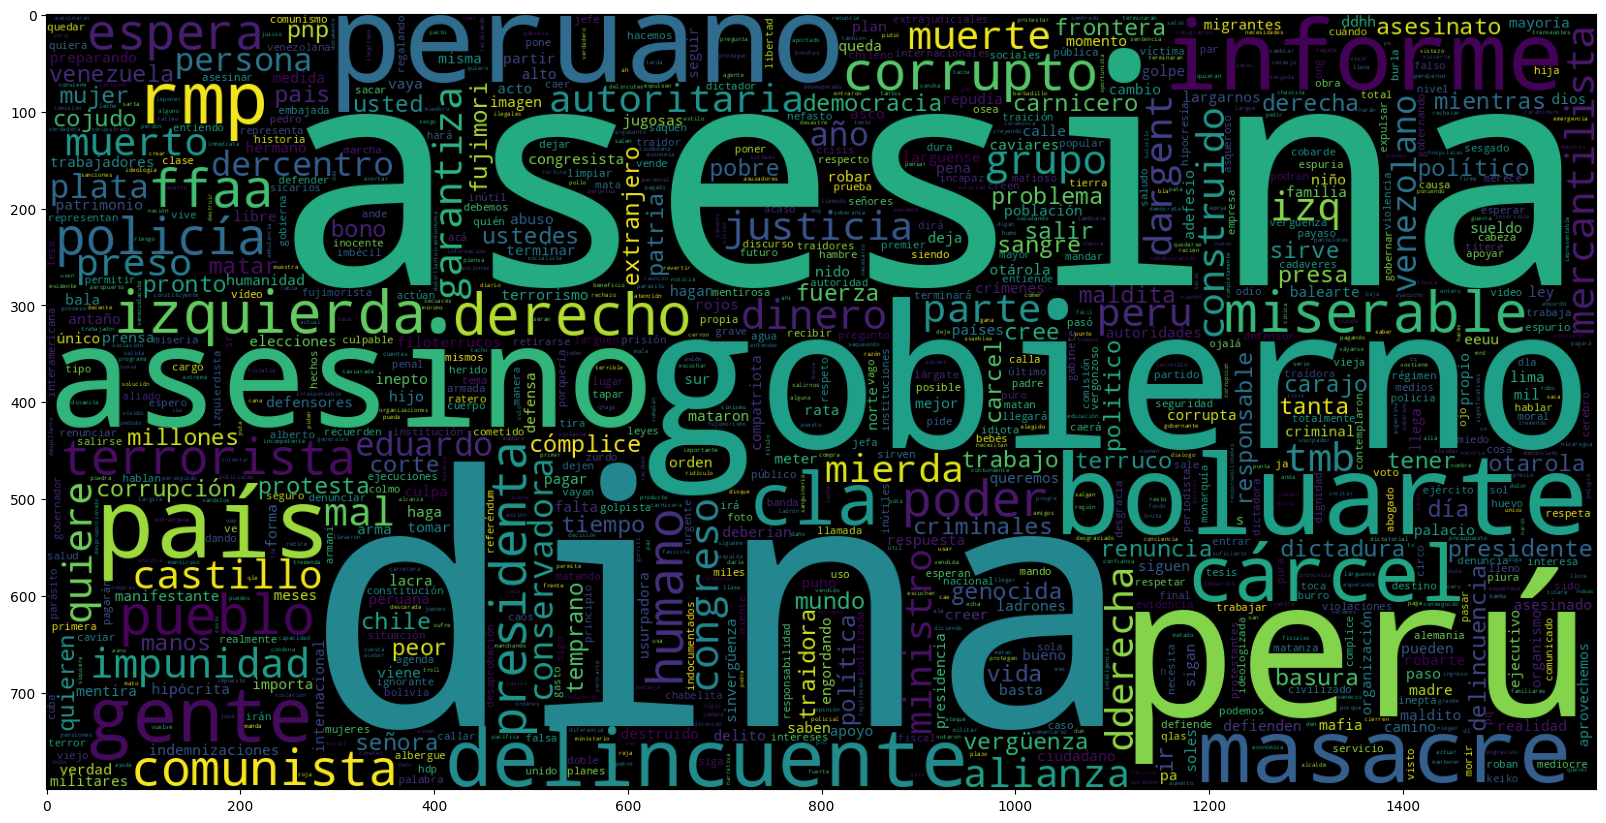

In [ ]:
data_negative = train_df.loc[train_df['target'] == 'Negativo', 'text'].tolist()
plt.figure(figsize = (20,20))
wc = WordCloud(stopwords=stopwords.words('spanish'),
               max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(' '.join([' '.join(text) for text in data_negative]))
plt.imshow(wc)

In [ ]:
train_df.head()

In [ ]:
train_df["word"]=train_df.text.str.join(' ')

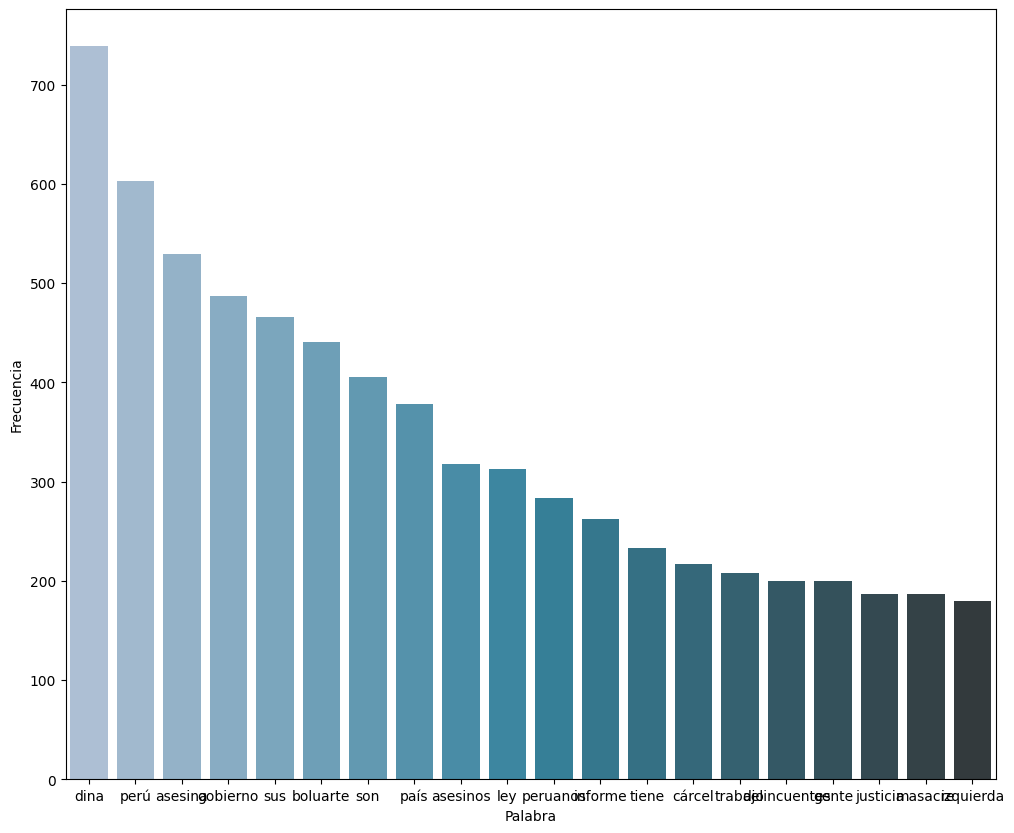

In [ ]:
cv = CountVectorizer()
bow = cv.fit_transform(train_df["word"])
word_freq = dict(zip(cv.get_feature_names_out(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['Palabra', 'Frecuencia'])
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="Palabra", y="Frecuencia", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

In [ ]:
# Crear vectores TF-IDF para representar los textos
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
train_vectors = tfidf_vectorizer.fit_transform(train_data)
test_vectors = tfidf_vectorizer.transform(test_data)

In [ ]:
# Definir modelos base
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('nb', BernoulliNB()),
    ('nb_multinomial', MultinomialNB()),
    ('svm', SVC(kernel='linear', probability=True)),
    ('decision_tree', DecisionTreeClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('knn', KNeighborsClassifier())
]

In [ ]:
# Definir los parámetros a explorar en la búsqueda de cuadrícula
# param_grid = {
#     'final_estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parámetros específicos del clasificador final (LogisticRegression)
#     'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parámetros específicos del modelo SVM
#     'decision_tree__max_depth': [None, 10, 20],  # Parámetros específicos del modelo DecisionTreeClassifier
#     'random_forest__n_estimators': [50, 100, 200],  # Parámetros específicos del modelo RandomForestClassifier
#     'knn__n_neighbors': [3, 5, 7]  # Parámetros específicos del modelo KNeighborsClassifier
# }


In [ ]:
# Definir clasificador final
final_classifier = LogisticRegression()

In [ ]:
# Crear el ensamble de clasificadores
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=final_classifier,
    stack_method='auto',
    n_jobs=-1  # Ajustar según el número de núcleos de tu CPU
)
# boosting_model = AdaBoostClassifier(
#     base_estimator=StackingClassifier(estimators=base_models, final_estimator=final_classifier, n_jobs=-1),
#     n_estimators=50,  # Ajusta el número de estimadores según sea necesario
#     random_state=42
# )

In [ ]:
#grid_search = GridSearchCV(stacking_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
#grid_search.fit(train_vectors, train_labels)

In [ ]:
# Obtener el mejor modelo y sus hiperparámetros
#best_model = grid_search.best_estimator_
#best_params = grid_search.best_params_

In [ ]:
# Medir la precisión del modelo mejorado
#accuracy = accuracy_score(test_labels, predictions)
#print(f'Precisión del modelo mejorado: {accuracy}')
#print(f'Mejores hiperparámetros: {best_params}')

In [ ]:
def evaluate_auc_curva(model, test_vectors, test_labels):
# Obtener las predicciones
  y_pred = model.predict(test_vectors)

  # Calcular el reporte de clasificación
  #print("Reporte de Clasificación:\n", classification_report(test_labels, y_pred))
  # Binarizar las etiquetas para la curva ROC
  test_labels_bin = label_binarize(test_labels, classes=[-1, 0, 1])
  # Obtener las probabilidades predichas para el conjunto de prueba
  y_score = model.predict_proba(test_vectors)
  # Calcular la curva ROC para cada clase
  plt.figure(figsize=(8, 6))

  for i in range(len(model.classes_)):
      fpr, tpr, _ = roc_curve(test_labels_bin[:, i], y_score[:, i])
      roc_auc = auc(fpr, tpr)
      # Graficar la curva ROC para cada clase
      modelo = "Negativo" if model.classes_[i] == -1 else ("Neutral" if model.classes_[i] == 0 else "Positivo")
      plt.plot(fpr, tpr, lw=2, label='Curva ROC (AUC = %0.2f) para clase %s' % (roc_auc, modelo))
      # Agregar título y leyenda para cada clase
      plt.title(f'Curva ROC para Análisis de Sentimientos (Clasificación {modelo})')
      plt.xlabel('Tasa de Falsos Positivos')
      plt.ylabel('Tasa de Verdaderos Positivos')
      plt.legend(loc="lower right")
      # Mostrar el gráfico actual antes de pasar a la siguiente clase
      plt.show()

  # Mostrar la línea diagonal de referencia en el último gráfico
  plt.plot([0, 1], [0, 1], 'k--', lw=2)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])

  # Mostrar el último gráfico
  plt.show()

In [ ]:

# Definir una función de formato para agregar el símbolo de porcentaje
def evaluate_matriz_confucion(model, test_vectors, test_labels):
  y_pred = model.predict(test_vectors)

  # Crear y visualizar la matriz de confusión con porcentajes
  cm = confusion_matrix(test_labels, y_pred)

  # Convertir a porcentajes
  cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
  #print(cm_percentage)
  # Utilizar seaborn para hacer la matriz de confusión más visual
  plt.figure(figsize=(10, 8))
  category_letters = ['Negativo', 'Neutral', 'Positivo']
  # formatter = FuncFormatter(percentage_format)
  sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=category_letters, yticklabels=category_letters)
  for i in range(len(model.classes_)):
      for j in range(len(model.classes_)):
          plt.text(j + 0.5, i + 0.7, f'Falso Neg={cm[i, j] if i == j else 0}', ha='center', va='center', fontsize=8, color='green')
          plt.text(j + 0.5, i + 0.3, f'Falso Pos={cm[i, j] - cm[j, j] if i != j else cm[i, j]}', ha='center', va='center', fontsize=8, color='red')
  plt.xlabel('Predicciones')
  plt.ylabel('Valores Verdaderos')
  plt.title('Matriz de Confusión (Porcentajes con Falso Negativo y Falso Positivo)')
  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


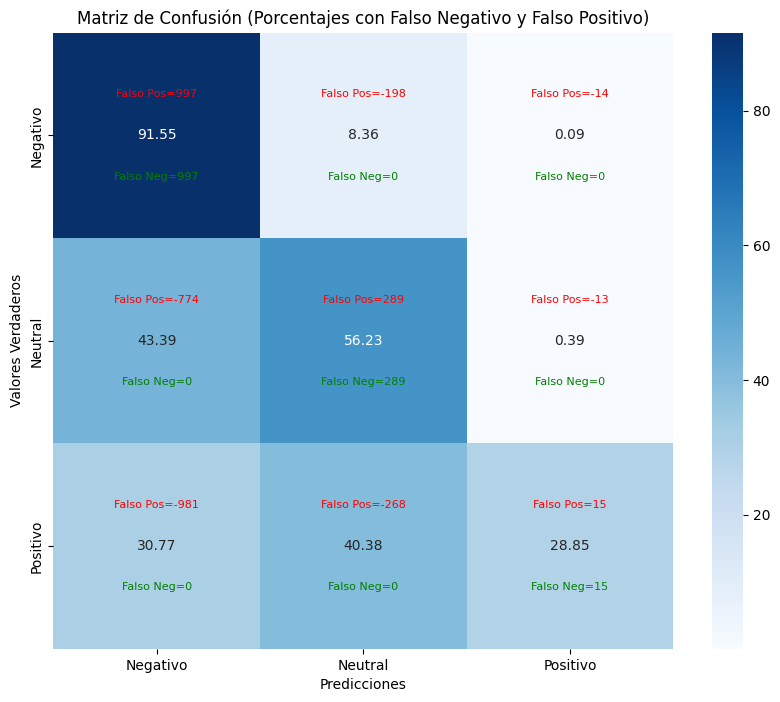

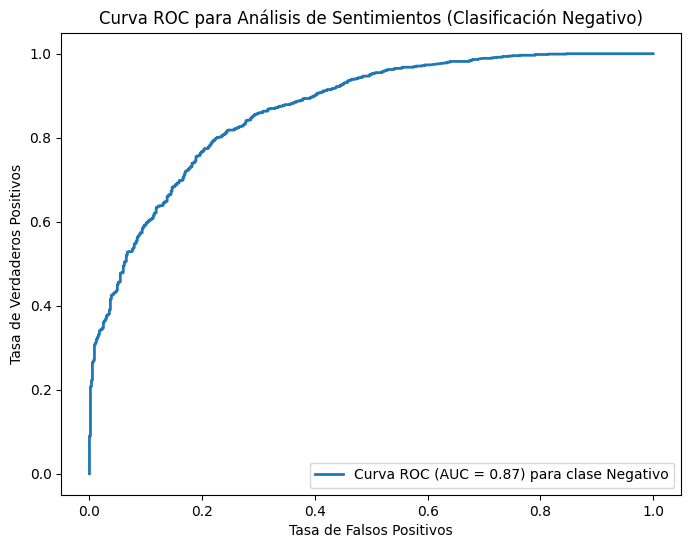

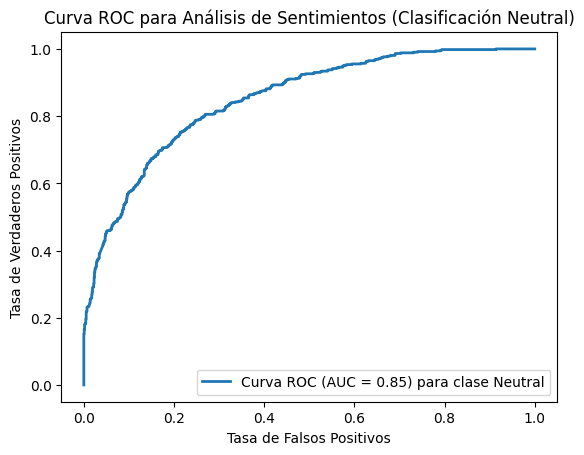

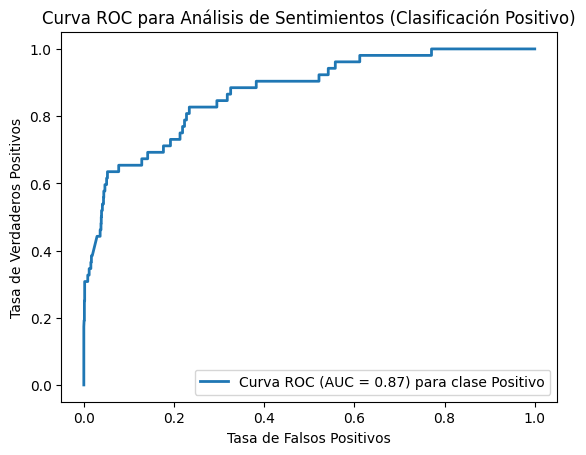

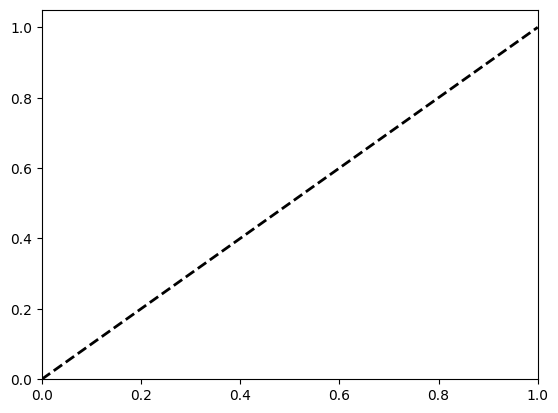

In [ ]:
# Entrenar el ensamble
stacking_model.fit(train_vectors, train_labels)
#boosting_model.fit(train_vectors, train_labels)
evaluate_matriz_confucion(stacking_model, test_vectors, test_labels)
evaluate_auc_curva(stacking_model, test_vectors, test_labels)


In [ ]:
# Mover el archivo desde Google Drive al entorno de Colab
!cp "/content/drive/MyDrive/modelosIndividuales/model_naive_bayes.pkl" .

In [ ]:
modelo_naive_bayes = joblib.load('model_naive_bayes.pkl')

In [ ]:
# Mover el archivo desde Google Drive al entorno de Colab
!cp "/content/drive/MyDrive/modelosIndividuales/model_regresion_logist.pkl" .

In [ ]:
def tokenize_and_preprocess(text):
  return text

In [ ]:
modelo_regresion_logistica = joblib.load('model_regresion_logist.pkl')

In [ ]:
# Realizar predicciones en el conjunto de prueba con el ensamble
predictions = stacking_model.predict(test_vectors)
predictions_nayve_bayes = modelo_naive_bayes.predict(test_data)
predictions_regresion_logist = modelo_regresion_logistica.predict(test_data)
#predictions = boosting_model.predict(test_vectors)

In [ ]:
# Crear un gráfico de barras para mostrar la precisión
def draw_accuracy(accuracy, des_model):
  plt.figure(figsize=(8, 6))
  plt.plot([0, 1], [accuracy, accuracy], marker='o', linestyle='-', color='b', label=f'Precisiòn del Modelo')
  plt.title(f'Precisión del Modelo {des_model}')
  plt.xlabel(f'Modelo {des_model}')
  plt.ylabel('Precisión')
  plt.legend()
  plt.show()

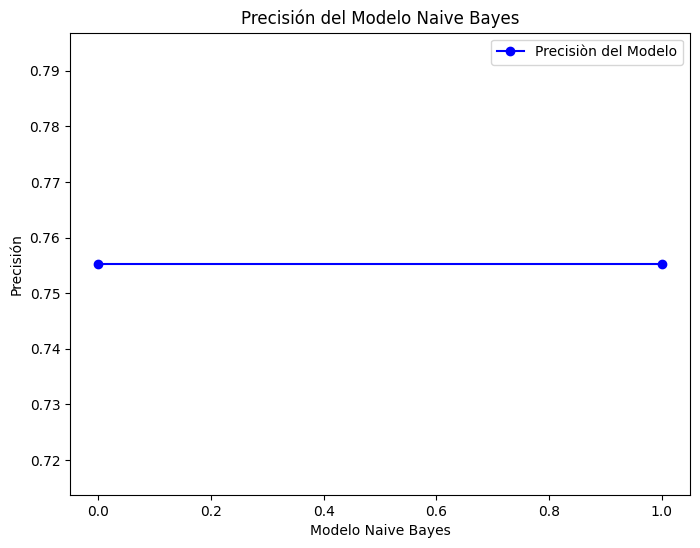

Precisión del modelo Naive Bayes: 0.7552870090634441


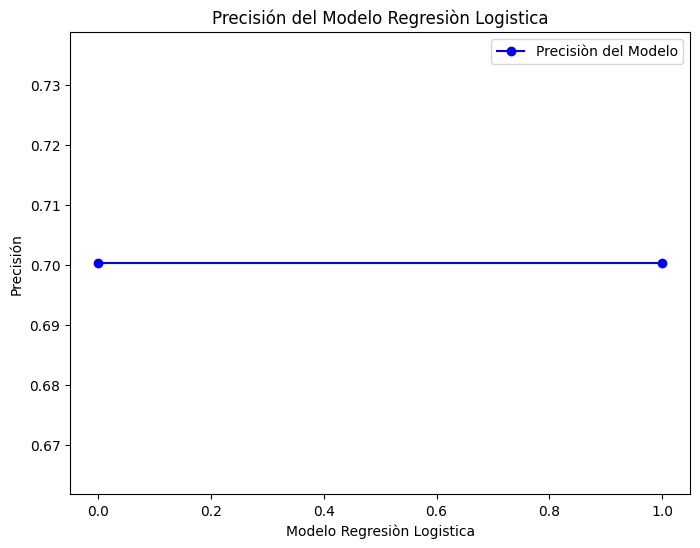

Precisión del modelo Logist Regresion: 0.7003021148036254


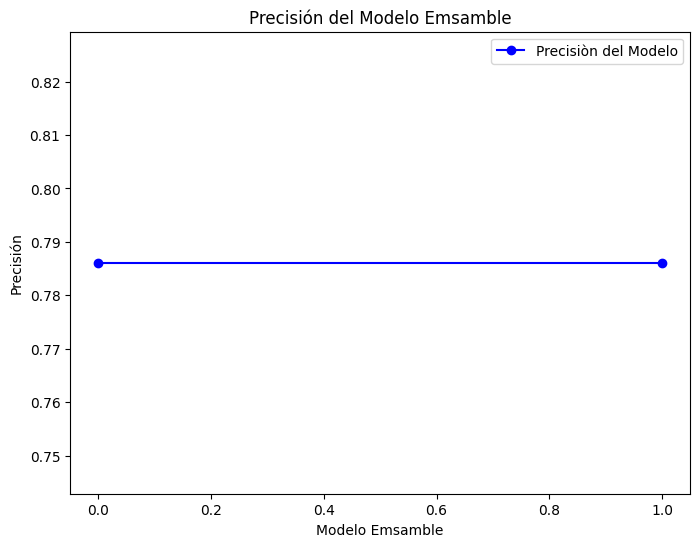

Precisión del ensamble: 0.7861027190332326


In [ ]:
# Medir la precisión del ensamble
accuracy_naive_bayes = accuracy_score(test_labels, predictions_nayve_bayes)
draw_accuracy(accuracy_naive_bayes, 'Naive Bayes')
print(f'Precisión del modelo Naive Bayes: {accuracy_naive_bayes}')
accuracy_logist_regresion = accuracy_score(test_labels, predictions_regresion_logist)
draw_accuracy(accuracy_logist_regresion, 'Regresiòn Logistica')
print(f'Precisión del modelo Logist Regresion: {accuracy_logist_regresion}')
accuracy_emsemble = accuracy_score(test_labels, predictions)
draw_accuracy(accuracy_emsemble, 'Emsamble')
print(f'Precisión del ensamble: {accuracy_emsemble}')

In [ ]:
# Guardar el ensamble en un archivo
joblib.dump(stacking_model, 'stacking_model.pkl')

['stacking_model.pkl']